In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install jupyter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.3 MB/s eta 0:00:00


In [6]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.7 MB/s eta 0:00:00


Train shape: (12654, 25)
           trip_id       country age_group             travel_companions  \
0  tour_idftaa27vp        FRANCE     45-64      With Spouse and Children   
1  tour_iduck75m57         KENYA     45-64                         Alone   
2  tour_id8y3w40h8  SOUTH AFRICA     25-44  With Other Friends/Relatives   
3  tour_idkoh8mkgr         ITALY     25-44                   With Spouse   
4  tour_idkmsfa00a         ITALY     25-44                   With Spouse   

   num_females  num_males       main_activity            visit_purpose  \
0          1.0        2.0       Beach Tourism     Leisure and Holidays   
1          1.0        0.0  Conference Tourism  Meetings and Conference   
2          2.0        0.0    Cultural Tourism  Meetings and Conference   
3          1.0        1.0     Widlife Tourism     Leisure and Holidays   
4          1.0        1.0       Beach Tourism     Leisure and Holidays   

  is_first_visit  mainland_stay_nights  ...  food_included  \
0          

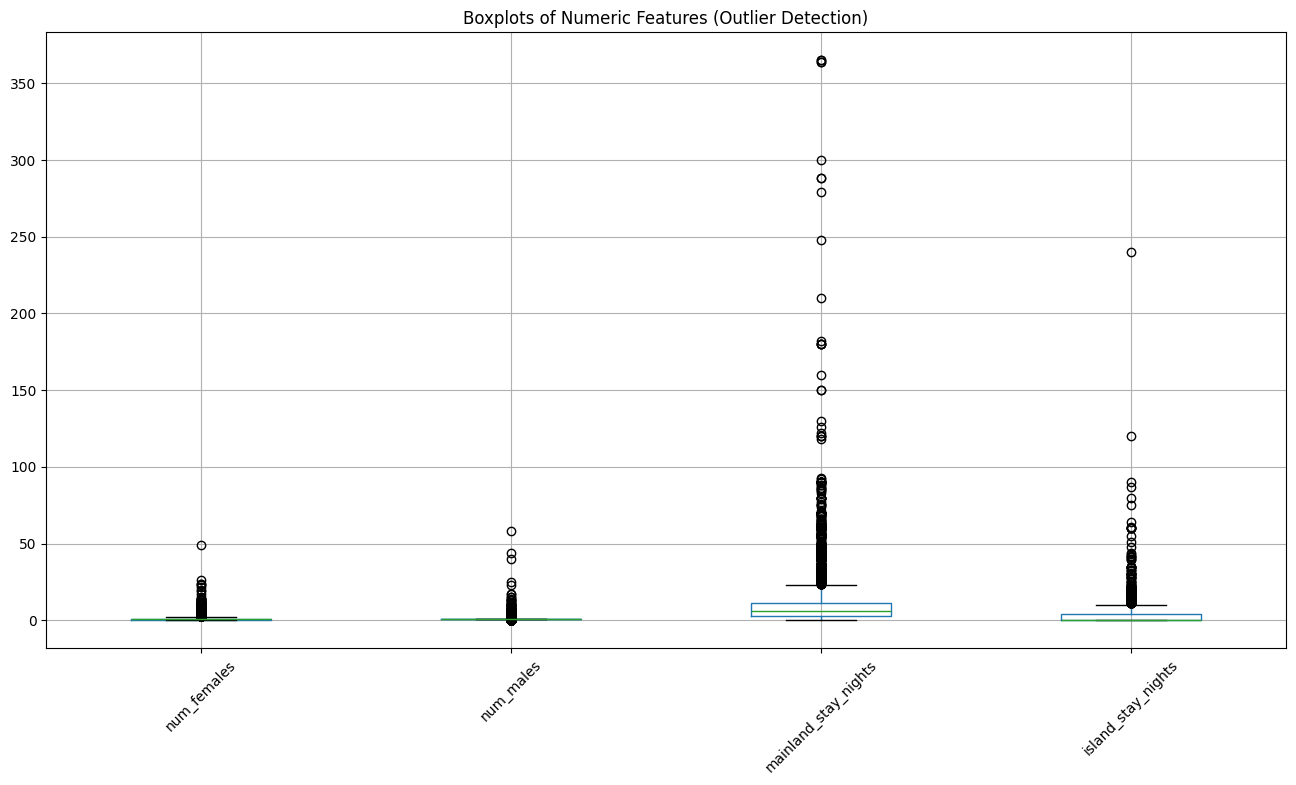

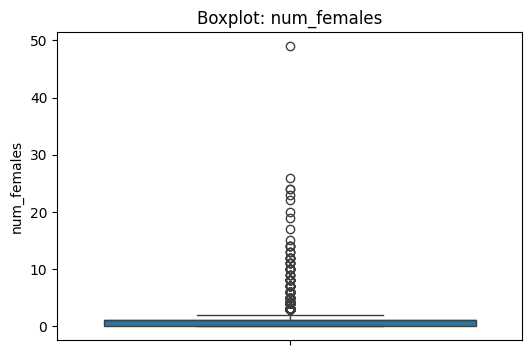

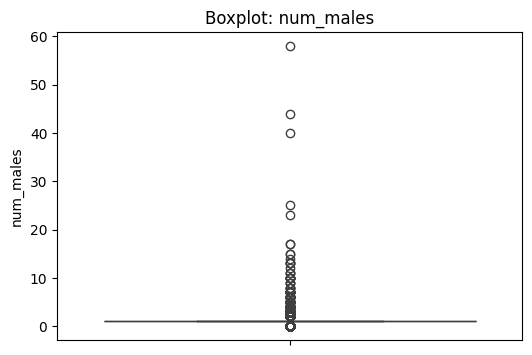

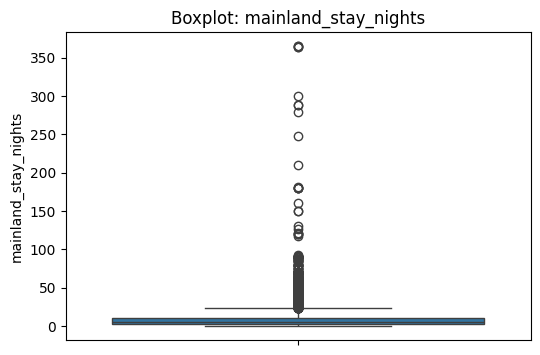

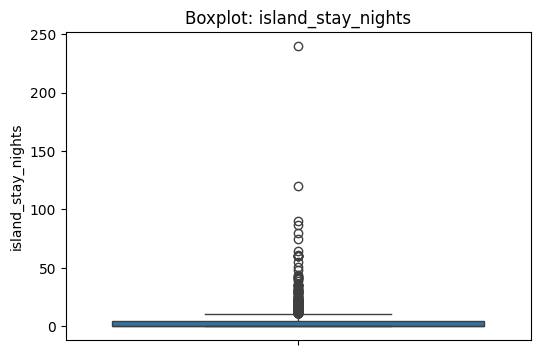

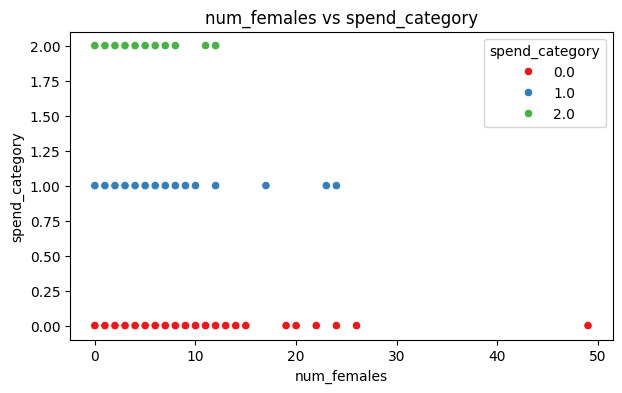

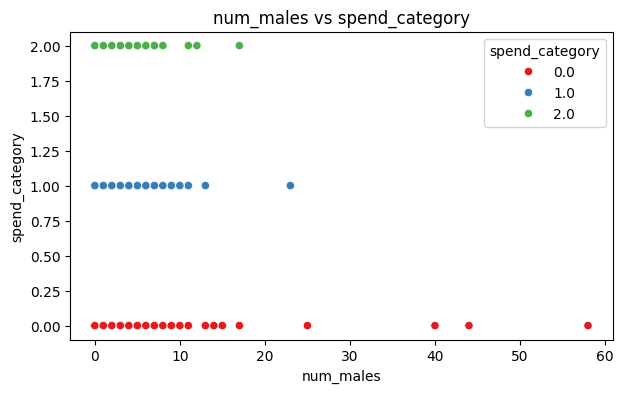

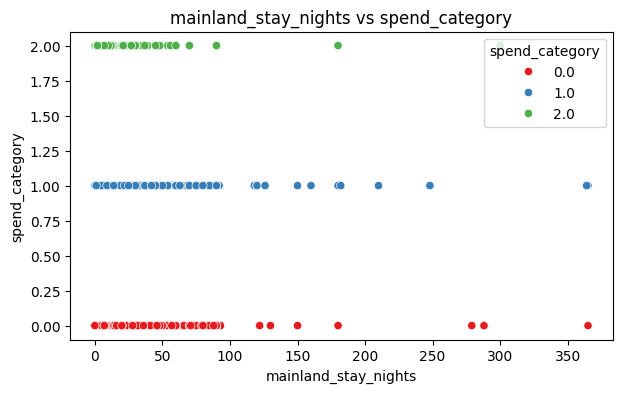

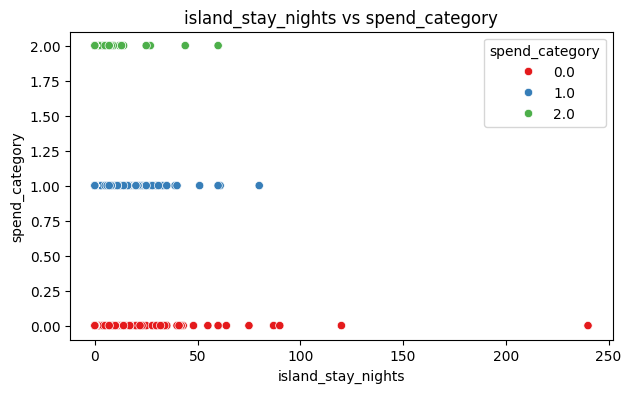

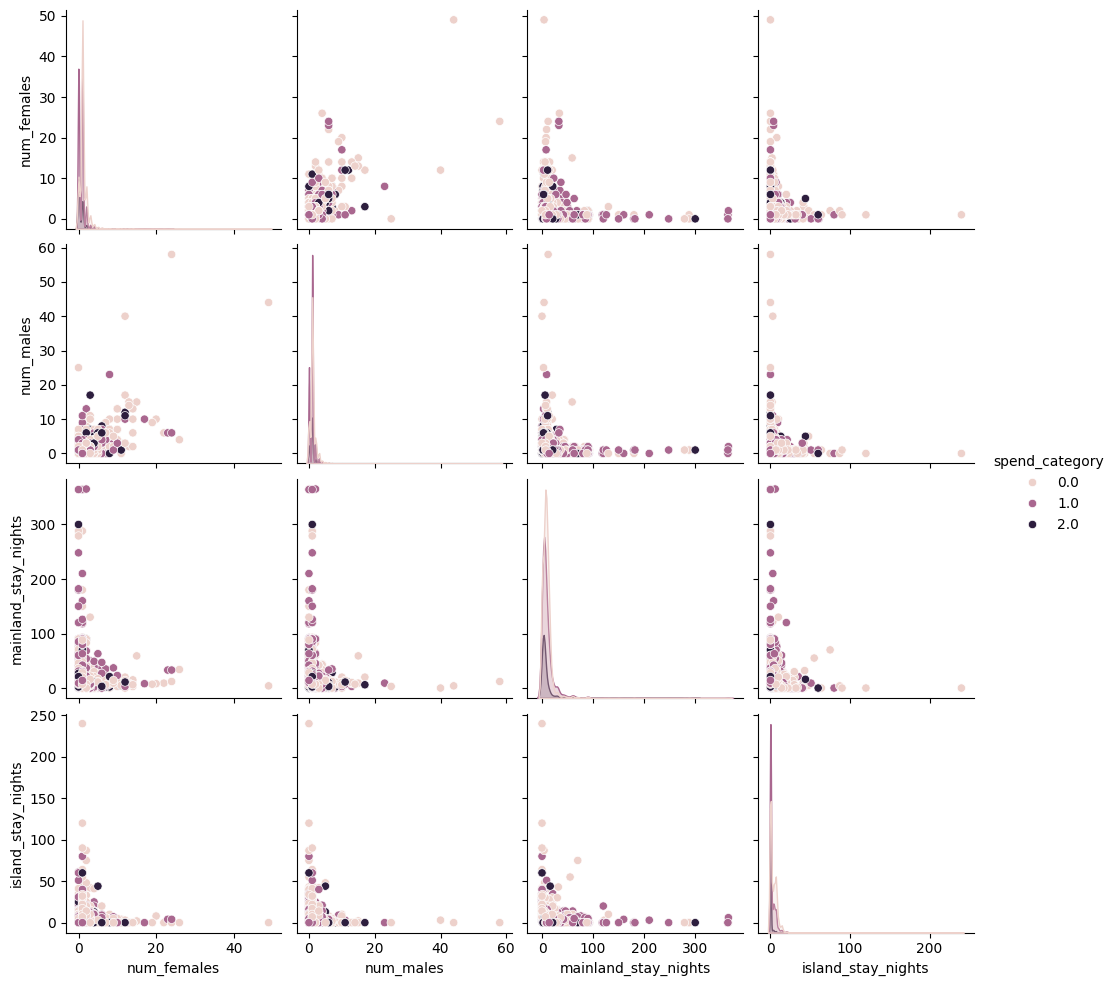


=== CORRELATION MATRIX ===
                      num_females  num_males  mainland_stay_nights  \
num_females              1.000000   0.448119             -0.000070   
num_males                0.448119   1.000000             -0.035149   
mainland_stay_nights    -0.000070  -0.035149              1.000000   
island_stay_nights       0.098306   0.019725             -0.103733   

                      island_stay_nights  
num_females                     0.098306  
num_males                       0.019725  
mainland_stay_nights           -0.103733  
island_stay_nights              1.000000  


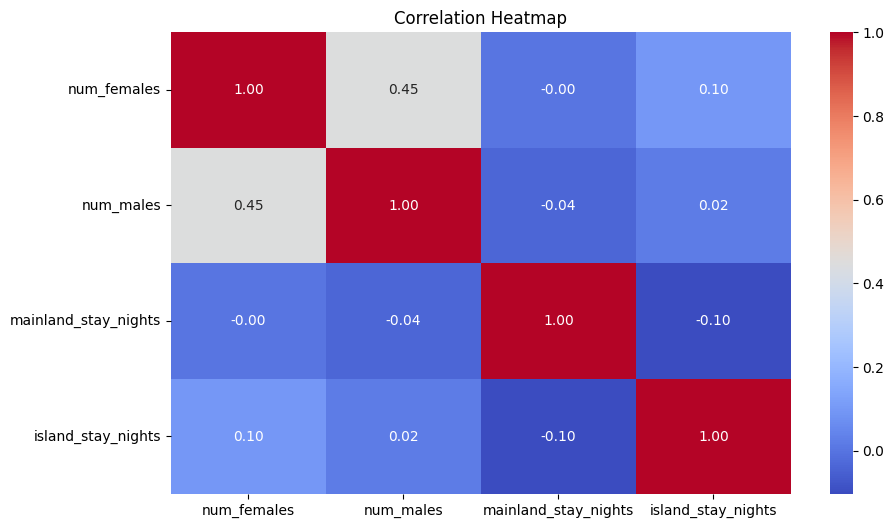


=== COVARIANCE MATRIX ===
                      num_females  num_males  mainland_stay_nights  \
num_females              1.608247   0.698560             -0.001289   
num_males                0.698560   1.524854             -0.631558   
mainland_stay_nights    -0.001289  -0.631558            211.659909   
island_stay_nights       0.639869   0.125023             -7.745450   

                      island_stay_nights  
num_females                     0.639869  
num_males                       0.125023  
mainland_stay_nights           -7.745450  
island_stay_nights             26.340150  


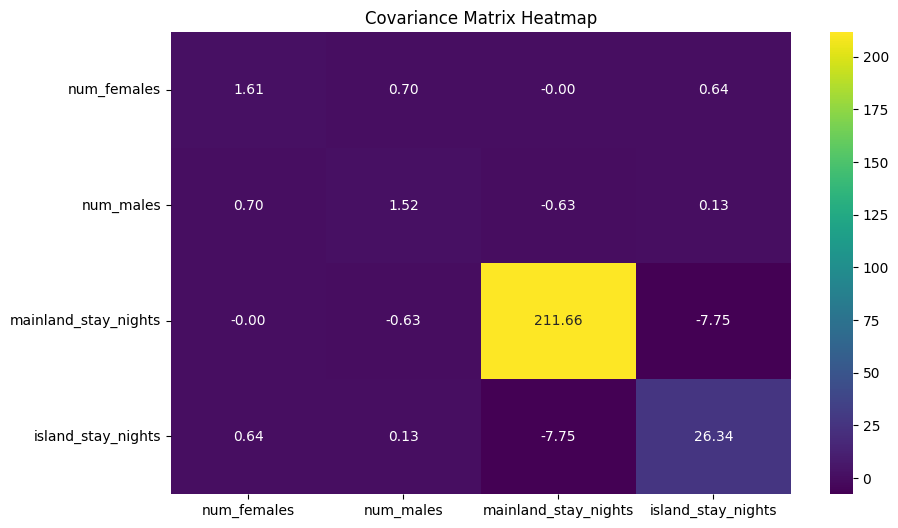


=== OUTLIERS USING IQR ===
num_females: 644 outliers found (Range: -1.50 to 2.50)
num_males: 4561 outliers found (Range: 1.00 to 1.00)
mainland_stay_nights: 776 outliers found (Range: -9.00 to 23.00)
island_stay_nights: 489 outliers found (Range: -6.00 to 10.00)

EDA Completed Successfully!


In [13]:
# ============================
#   EDA + OUTLIER ANALYSIS
#   MULTICLASS SPEND CATEGORY
# ============================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------------------
# Load Training Data
# ---------------------------------------------------------------------
train_path = "/content/drive/MyDrive/ML_Project/MultinomialClassification/Dataset/train.csv"   # <-- CHANGE PATH
train_df = pd.read_csv(train_path)

print("Train shape:", train_df.shape)
print(train_df.head())

# ---------------------------------------------------------------------
# Target column
# ---------------------------------------------------------------------
TARGET = "spend_category"

# ---------------------------------------------------------------------
# Numeric columns (from dataset description)
# ---------------------------------------------------------------------
numeric_cols = [
    "num_females",
    "num_males",
    "mainland_stay_nights",
    "island_stay_nights",
    # # after cleaning / mapping:
    # "total_trip_days_numeric",
    # "days_booked_before_trip_numeric"
]

print("\nNumeric Columns:", numeric_cols)

# ==========================================================
# 1. Summary Statistics
# ==========================================================
print("\n=== SUMMARY STATISTICS ===")
print(train_df[numeric_cols].describe())

# ==========================================================
# 2. Boxplots → Outlier Detection
# ==========================================================
plt.figure(figsize=(16, 8))
train_df[numeric_cols].boxplot()
plt.title("Boxplots of Numeric Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

# Individual boxplots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

# ==========================================================
# 3. Scatter Plots vs Target
# ==========================================================
for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(
        x=train_df[col],
        y=train_df[TARGET],
        hue=train_df[TARGET],
        palette="Set1"
    )
    plt.title(f"{col} vs {TARGET}")
    plt.show()

# ==========================================================
# 4. Pairplot (numeric + target)
# ==========================================================
sns.pairplot(train_df[numeric_cols + [TARGET]], hue=TARGET)
plt.show()

# ==========================================================
# 5. CORRELATION MATRIX (Pearson)
# ==========================================================
corr_matrix = train_df[numeric_cols].corr()

print("\n=== CORRELATION MATRIX ===")
print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ==========================================================
# 6. COVARIANCE MATRIX (Requested)
# ==========================================================
cov_matrix = train_df[numeric_cols].cov()

print("\n=== COVARIANCE MATRIX ===")
print(cov_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()

# ==========================================================
# 7. Outlier Detection Using IQR
# ==========================================================
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return len(outliers), lower, upper

print("\n=== OUTLIERS USING IQR ===")
for col in numeric_cols:
    cnt, low, high = detect_outliers_iqr(train_df, col)
    print(f"{col}: {cnt} outliers found (Range: {low:.2f} to {high:.2f})")

print("\nEDA Completed Successfully!")
